# Tasks

Machine Learning and Statistics

Winter 2023/24

by Kenneth Linehan

## Task 1 

***

> Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as `math`. In this task, 1 you should write a function `sqrt(x)` to approximate the square root of a floating point number x without using the power operator or a package.

> Rather, you should use the Newton’s method.  Start with an Square Roots via Newton’s Method. initial guess for the square root called $z_0$. You then repeatedly improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z{i+1}$ is less than some threshold, say 0.01.


## Imports                                                                                                         
Imports libraries for notebook

In [2]:
# Data frames.
import pandas as pd

# Shuffles.
import random

# Statistics.
import scipy.stats as ss

# Plotting
import matplotlib.pyplot as plt


## Newton's Method


- Newton's method is a technique for solving equations of the form f(x)=0 by successive approximation. The idea is to pick an initial guess x0 such that f(x0) is reasonably close to 0. In other words, it is used for approximating the square root is an iterative algorithm that refines an initial guess to get closer and closer to the actual square root of a given number. 

- It starts with an initial guess which is called $z_0$.

- It the creates iterative refinement using this formula:
$$ z_{i+1} = z_i − \frac{z_i × z_i − x} {2z_i} $$

- It will repeat Until convergence,  until the difference between consecutive estimates is less than a predetermined threshold defined by the user.


(Adapted from: https://en.wikipedia.org/wiki/Newton%27s_method Assessed 07/01/2024)

(Adapted from: https://web.ma.utexas.edu/users/m408n/CurrentWeb/LM4-8-2.php, Assessed 07/01/2024)


- In the next section, I will show how the inbuilt function in Python works and then use Newton's Method to see how we can make the result as accurate as possible.


In [3]:
def sqrt(x):
    # initial guess for square root
    z = x / 4.0

    # Loop until we are accurate enough
    for i in range(100):
        # Newton's Method for a better approximation
        z = z - (((z * z) - x) / (2 * z))

    # z should now be an approximation for the square root
    return z


In [4]:
## Test function on 3

sqrt(3)

1.7320508075688774

In [5]:
## Check Pythons value for square root of 3

3**0.5

1.7320508075688772

In [6]:
## I used a youtube video  to understand a iterative way I could get this to work- https://www.youtube.com/watch?v=99ABkygm2Xg 

def sqrt_with_iterations(x, max_iterations=100):
    # initial guess for square root
    z = x / 4.0

    # Loop until we reach the maximum number of iterations
    for i in range(max_iterations):
        # Newton's Method for a better approximation
        z_next = z - (((z * z) - x) / (2 * z))

        z = z_next

    # Return the last iteration and the last approximation
    return max_iterations, z

# Test with 3
number_to_approximate = 3
iterations, result = sqrt_with_iterations(number_to_approximate)

# Print the results in a more readable format
print(f"For the number {number_to_approximate}, the square root approximation took {iterations} iterations.")
print(f"The final approximation is {result:.15f}.")


           

# I used the old code and then found how someone used a similar method previously - https://mathematica.stackexchange.com/questions/77470/iteration-convergence-of-newton-approximations


For the number 3, the square root approximation took 100 iterations.
The final approximation is 1.732050807568877.


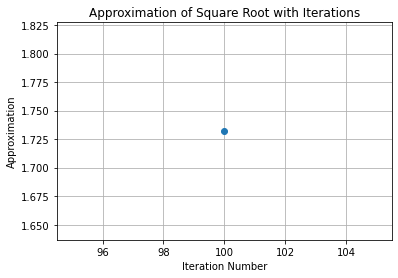

In [7]:
def plot_iterations(iteration_numbers, approximations):
    # Plot the iterations
    plt.plot(iteration_numbers, approximations, marker='o')
    plt.title('Approximation of Square Root with Iterations')
    plt.xlabel('Iteration Number')
    plt.ylabel('Approximation')
    plt.grid(True)
    plt.show()

# Test with 3
number_to_approximate = 3
iteration_numbers, approximations = sqrt_with_iterations(number_to_approximate)

# Print and plot the results
plot_iterations(iteration_numbers, approximations)

### Notes

- We can see from the above that building the formula for that there is a very small difference in us creating a formula and the inbuilt square root function

- In the first examples, I didn't have enough iterations for Newton's method to converge which was why the numbers are close, but slightly different.

- Newton's method uses a convergence criterion based on the difference between consecutive iterations being smaller than a predefined threshold, whereas my test was too small.

- I decided to run a test with more iterations of the number, which gave us the exact same answer as the inbuilt python function, which shows how Newton's works.

- To summarize, the graph illustrates the iterative refinement of the square root approximation using Newton's Method. As iterations progress, the method converges, and the curve's convergence signifies improved accuracy at each step.

- It shows that it took approximately 6 attempts to get the exact correct number.


***



***

## End

# Task 2

> Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.


<table>
  <tr>
    <th style="border: none;"></th>
    <th style="border: none;"></th>
    <th style="border-right;"><em>Biscuit</em></th>
    <th style="border: none;"></th>
  </tr>
  <tr>
    <th style="border: none;"></th>
    <th style="border: none;"></th>
    <td style="border-right;"><strong>Chocolate</strong></td>
    <td><strong>Plain</strong></td>
  </tr>
  <tr>
    <td><em>Drink</em></td>
    <td>Coffee</td>
    <td>43</td>
    <td>57</td>
  </tr>
  <tr>
    <th style="border: none;"></th>
    <td>Tea</td>
    <td>56</td>
    <td>45</td>
  </tr>
</table>



## Imports                                                                                                         
Imports libraries for Task 2

In [8]:
import numpy as np

# Data frames.
import pandas as pd

# Shuffles.
import random

# Statistics.
import scipy.stats as ss

# Graphs
import seaborn as sns

# Plotting
import matplotlib.pyplot as plt

# Mosaic
from statsmodels.graphics.mosaicplot import mosaic

# Count
from collections import Counter

## What is a chi squared test?

Chi-Squared Test:


$$ \chi^{2} = \sum \frac{(O_{i} - E_{i})^{2}}{E_{i}} $$

- The chi-squared test, also known as the chi-square or χ2 test, is a statistical method used to analyze contingency tables. Contingency tables are used when we want to study the association between two categorical variables. The main goal of the chi-squared test is to determine if there is a significant association or dependence between the two categorical variables represented in the contingency table. The chi-squared test helps us explore whether there's a meaningful relationship between two categorical variables.

(Adapted from https://en.wikipedia.org/wiki/Chi-squared_test)

- In the example in the question, we will determine if there is a evidence of a relationship between drink and biscuit preferences in the survey. To explain this, the chi-squared test helps us to figure out if there's a real link between what people like to drink and what kind of biscuits they enjoy.

## Creating the raw data

In this first part of working with the data, I am going to create all raw data from the choices made by the participants in the survey.

In [9]:
# Forty Three who preferred the drink Coffee and Chocolate
coffee_chocolate = [['Coffee', 'Chocolate']] * 43

# Show
print(coffee_chocolate)



[['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'],

In [10]:
# Fifty Seven who preferred the drink Coffee and plain biscuits
coffee_plain = [['Coffee', 'Plain']] * 57

# Show
print(coffee_plain)

[['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', '

In [11]:
# Fifty six who preferred the drink tea and chocolate biscuits
tea_chocolate = [['Tea', 'Chocolate']] * 56

# Show
print(tea_chocolate)

[['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', '

In [12]:
# Forty Three who preferred the drink tea and plain biscuits
tea_plain = [['Tea', 'Plain']] * 45

# Show
print(tea_plain)

[['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain']]


In [13]:
# Raw data, merge the four lists.
raw_data = coffee_chocolate + coffee_plain + tea_chocolate + tea_plain

# Shuffle and split the data randomly
shuffled_data = random.sample(raw_data, len(raw_data))

# Show the shuffled and split data.
print(shuffled_data)


[['Coffee', 'Plain'], ['Tea', 'Chocolate'], ['Tea', 'Plain'], ['Coffee', 'Chocolate'], ['Coffee', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Chocolate'], ['Tea', 'Plain'], ['Coffee', 'Plain'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Tea', 'Chocolate'], ['Coffee', 'Plain'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Coffee', 'Chocolate'], ['Tea', 'Chocolate'], ['Coffee', 'Plain'], ['Coffee', 'Chocolate'], ['Tea', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Tea', 'Plain'], ['Coffee', 'Plain'], ['Tea', 'Chocolate'], ['Coffee', 'Plain'], ['Tea', 'Plain'], ['Coffee', 

In [14]:
# Interchanges the outer and inner lists.
drink, biscuit = list(zip(*raw_data))

# Count occurrences of each element
drink_counter = Counter(drink)
biscuit_counter = Counter(biscuit)


# Instead of printing all seperately I changed this code into a counter.
drink_counter

biscuit_counter



Counter({'Chocolate': 99, 'Plain': 102})

In [15]:
# Create a data frame.
df = pd.DataFrame({'Drink': drink, 'Biscuit': biscuit})

# Show.
df

,Drink,Biscuit
0,Coffee,Chocolate
1,Coffee,Chocolate
2,Coffee,Chocolate
3,Coffee,Chocolate
4,Coffee,Chocolate
...,...,...
196,Tea,Plain
197,Tea,Plain
198,Tea,Plain
199,Tea,Plain


## Contingency Table

***

In [16]:
# Creating a contingency table with 'drink' and 'biscuit' columns
contingency_table = pd.crosstab(df['Drink'], df['Biscuit'])

# Show the contingency table
print(contingency_table)

Biscuit  Chocolate  Plain
Drink                    
Coffee          43     57
Tea             56     45


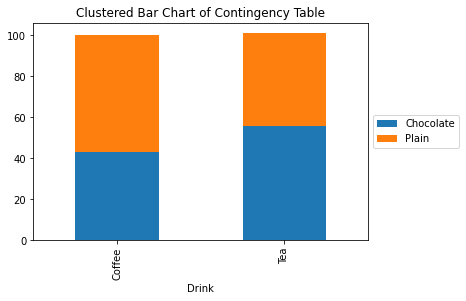

In [17]:
contingency_table.plot(kind='bar', stacked=True)
plt.title('Clustered Bar Chart of Contingency Table')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))  # Place legend to the right
plt.show()


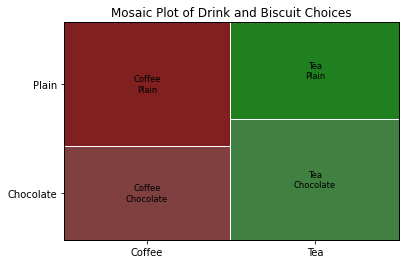

In [18]:
mosaic(df, ['Drink', 'Biscuit'])
plt.title('Mosaic Plot of Drink and Biscuit Choices')
plt.show()

In [19]:
# Perform Crosstabs Contingency.
cross = ss.contingency.crosstab(df['Biscuit'], df['Drink'])

# Show.
cross

((array(['Chocolate', 'Plain'], dtype=object),
  array(['Coffee', 'Tea'], dtype=object)),
 array([[43, 56],
        [57, 45]]))

In [20]:
# Unpack elements
first, second = cross  # Unpack the elements of the tuple

# Show
print(first, second)


(array(['Chocolate', 'Plain'], dtype=object), array(['Coffee', 'Tea'], dtype=object)) [[43 56]
 [57 45]]


In [21]:
# Create a DataFrame with the provided data
data = pd.DataFrame({'Biscuit': ['Chocolate', 'Plain'],
                     'Coffee': [43, 57],
                     'Tea': [56, 45]})

# Set 'Biscuit' column as the index
data.set_index('Biscuit', inplace=True)


In [22]:
# Perform the chi-squared test
chi2, p, _, _ = ss.chi2_contingency(data)

# Output the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 2.6359100836554257
P-value: 0.10447218120907394


In [23]:
# Determine the significance level (alpha) for your test
alpha = 0.05

# Compare the p-value to alpha to make a decision
if p < alpha:
    print("There is evidence of an association between drink preference and biscuit preference.")
else:
    print("There is no evidence of an association between drink preference and biscuit preference.")

There is no evidence of an association between drink preference and biscuit preference.


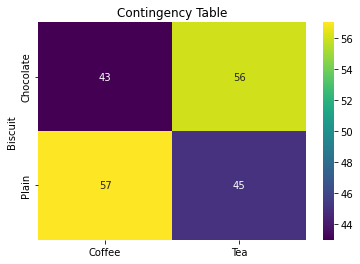

In [24]:
# Create a heatmap of the contingency table
sns.heatmap(data, annot=True, cmap='viridis', fmt='d', cbar=True)
plt.title('Contingency Table')
plt.show()

## Notes
***

- I firstly started with graphs to visualise the data, as it easier to see what we are working with in a graph format, the mosaic plot provides us a visual summary of the relationship between two categorical variables, in this case, 'Drink' and 'Biscuit' choices.

- A larger p-value (e.g., above 0.05) suggests there is not enough evidence to reject the null hypothesis, and the association is not statistically significant. This means that there isn't a sufficient evidence to conclude that there is a significant association between the choices of drink and biscuit.

- The contingency table shows us the distribution of categorical variables and identifying potential associations between them.

- It was determined that there are no association between drink preference and biscuit preference.

- Based on the results, it is suggesting that there isn't a significant association between the choices of drink and biscuit in the data.



***

## End

# Task 3

> Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins

In [25]:
# libraries

import seaborn as sns

import scipy.stats as stats

import pandas as pd

import urllib.request

from scipy.stats import ttest_ind

In [26]:
csv = "https://github.com/mwaskom/seaborn-data/raw/master/penguins.csv"

# Download the dataset from the URL and read it into a DataFrame
with urllib.request.urlopen(csv) as response:
    penguins = pd.read_csv(response)

## General Info on Dataset

I am not very familiar with this dataset, so firstly I decided to use numpy to get a general review of this dataset.

In [27]:
print(penguins.head(10))


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
5       3650.0    MALE  
6       36

In [28]:
print(penguins.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [29]:
print(penguins.describe())


       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [30]:
print(penguins['species'].value_counts())


Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


In [31]:
print(penguins.isnull().sum())


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [32]:
#  calculates and prints the correlation matrix for a DataFrame 
print(penguins.corr())


                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   

                   body_mass_g  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  


## T-Test on Dataset

- A t-test is a statistical method used to compare the means of two groups and determine if they are significantly different from each other. A t-test can be used to assess whether a single group differs from a known value (one-sample t-test), whether two groups exhibit a significant difference from each other (independent two-sample t-test), or whether there is a notable distinction in paired measurements (paired, or dependent samples t-test).

(I adapted the above from this: https://www.jmp.com/en_ch/statistics-knowledge-portal/t-test.html)

- Now that I have a bit more understanding on the dataset, I will prepare a t-test on the dataset. There are three forms of  t-tests completed, these are one-sample t-test, two-sample t-test; and two-sample paired t-test. The one-sample t-test examines a single dataset to determine whether a particular statistic within that dataset is equal to a specified value. For example, it can be used to assess whether the mean of the dataset is equal to zero. This wouldn't really work with the penguin dataset, as we need to investigate two independent groups to determine if there is a statistically significant difference between them.

- Below is the latex for a one sample t-test:

One sample t-test:

$$ t = \frac{Z}{s} = \frac{\bar{X} - \mu}{\frac{\hat{\sigma}}{\sqrt{n}}} $$

We will use the independent samples t-test to investigate this dataset:

$$ t = \frac{m_A - m_B}{\sqrt{\frac{S^2}{n_A} + \frac{S^2}{n_B}}} $$

- A and B represent the two groups to compare.

- mAand mB represent the means of groups A and B, respectively.

- nA and nB represent the sizes of group A and B, respectively.

(I adapted the above from this: https://libguides.library.kent.edu/spss/independentttest)

(I adapted the formula to complete the t-test from this: https://rpubs.com/Manahel/1134954)


- For the purposes of our dataset, we'll say A is male and B is female


In [33]:
## Used this code as basis for below: https://cs533.ekstrandom.net/f20/resources/tutorials/penguinsamples/
## I also used the lecture notes to determine how to split the data

# Seperates the sex of male penguins

male_penguins_df = penguins[penguins['sex'] == 'MALE']

In [34]:
print (male_penguins_df)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
7    Adelie  Torgersen            39.2           19.6              195.0   
13   Adelie  Torgersen            38.6           21.2              191.0   
14   Adelie  Torgersen            34.6           21.1              198.0   
..      ...        ...             ...            ...                ...   
333  Gentoo     Biscoe            51.5           16.3              230.0   
335  Gentoo     Biscoe            55.1           16.0              230.0   
337  Gentoo     Biscoe            48.8           16.2              222.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g   sex  
0         3750.0  MALE  
5         3650.0  MALE  
7         46

In [35]:
female_penguins_df = penguins[penguins['sex'] == 'FEMALE']

In [36]:
print (female_penguins_df)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
6    Adelie  Torgersen            38.9           17.8              181.0   
12   Adelie  Torgersen            41.1           17.6              182.0   
..      ...        ...             ...            ...                ...   
332  Gentoo     Biscoe            43.5           15.2              213.0   
334  Gentoo     Biscoe            46.2           14.1              217.0   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   

     body_mass_g     sex  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4     

In [37]:
# Filter the DataFrame to select only male penguins
male_penguins_df = penguins[penguins['sex'] == 'MALE']

# Print the top 5 rows: species, island, sex, and body mass for male penguins to make sure this is working
print("Top 5 Rows of Male Penguins:")
for index, row in male_penguins_df.head().iterrows():
    print(f"Species: {row['species']}, Island: {row['island']}, Sex: {row['sex']}, Body Mass: {row['body_mass_g']} grams")


Top 5 Rows of Male Penguins:
Species: Adelie, Island: Torgersen, Sex: MALE, Body Mass: 3750.0 grams
Species: Adelie, Island: Torgersen, Sex: MALE, Body Mass: 3650.0 grams
Species: Adelie, Island: Torgersen, Sex: MALE, Body Mass: 4675.0 grams
Species: Adelie, Island: Torgersen, Sex: MALE, Body Mass: 3800.0 grams
Species: Adelie, Island: Torgersen, Sex: MALE, Body Mass: 4400.0 grams


In [38]:
# Filter the DataFrame to select only female penguins
female_penguins_df = penguins[penguins['sex'] == 'FEMALE']

# Print the top 5 rows: species, island, sex, and body mass for female penguins
print("Top 5 rows of Female Penguins:")
for index, row in female_penguins_df.head().iterrows():
    print(f"Species: {row['species']}, Island: {row['island']}, Sex: {row['sex']}, Body Mass: {row['body_mass_g']} grams")


Top 5 rows of Female Penguins:
Species: Adelie, Island: Torgersen, Sex: FEMALE, Body Mass: 3800.0 grams
Species: Adelie, Island: Torgersen, Sex: FEMALE, Body Mass: 3250.0 grams
Species: Adelie, Island: Torgersen, Sex: FEMALE, Body Mass: 3450.0 grams
Species: Adelie, Island: Torgersen, Sex: FEMALE, Body Mass: 3625.0 grams
Species: Adelie, Island: Torgersen, Sex: FEMALE, Body Mass: 3200.0 grams


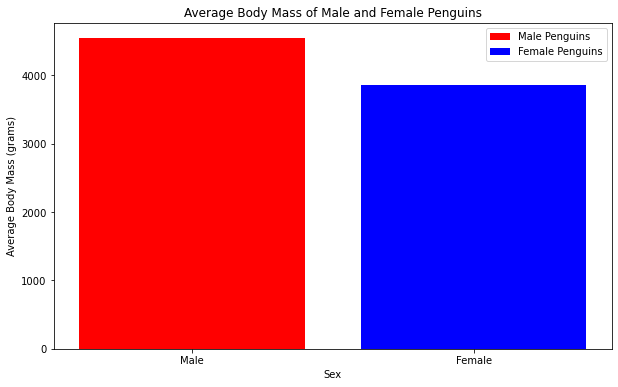

In [39]:
# Separate male and female penguins
male_penguins = penguins[penguins['sex'] == 'MALE']
female_penguins = penguins[penguins['sex'] == 'FEMALE']

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar('Male', male_penguins['body_mass_g'].mean(), color='red', label='Male Penguins')
plt.bar('Female', female_penguins['body_mass_g'].mean(), color='blue', label='Female Penguins')

plt.xlabel('Sex')
plt.ylabel('Average Body Mass (grams)')
plt.title('Average Body Mass of Male and Female Penguins')
plt.legend()
plt.show()


In [40]:
# Perform independent t-test

# DataFrames for male and female penguins
male_body_mass = male_penguins['body_mass_g']
female_body_mass = female_penguins['body_mass_g']

In [41]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(male_body_mass, female_body_mass, equal_var=False)

In [42]:
# Display the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: 8.554537231165762
P-Value: 4.793891255051492e-16


In [43]:
# Interpret the results
if p_value < 0.05:
    print("There is evidence of a significant difference in the body mass of male and female penguins.")
else:
    print("There is no significant difference in the body mass of male and female penguins.")

There is evidence of a significant difference in the body mass of male and female penguins.


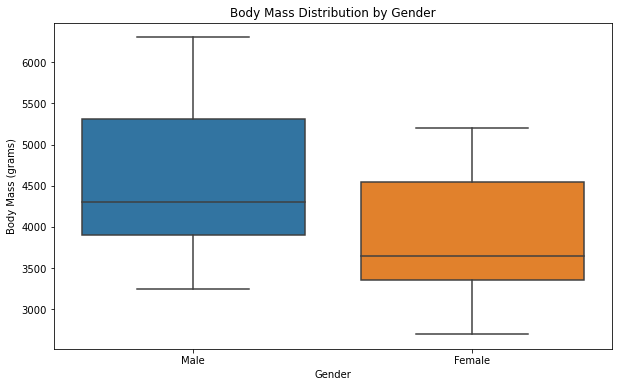

In [44]:
# Combine male and female body mass data into a single DataFrame
combined_body_mass = pd.concat([male_penguins['body_mass_g'], female_penguins['body_mass_g']], axis=1, keys=['Male', 'Female'])

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_body_mass)
plt.title('Body Mass Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Body Mass (grams)')
plt.show()


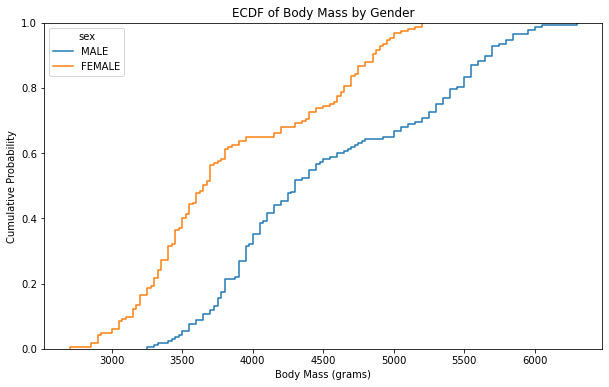

In [45]:
# Plot ECDF
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=penguins, x='body_mass_g', hue='sex')
plt.title('ECDF of Body Mass by Gender')
plt.xlabel('Body Mass (grams)')
plt.ylabel('Cumulative Probability')
plt.show()

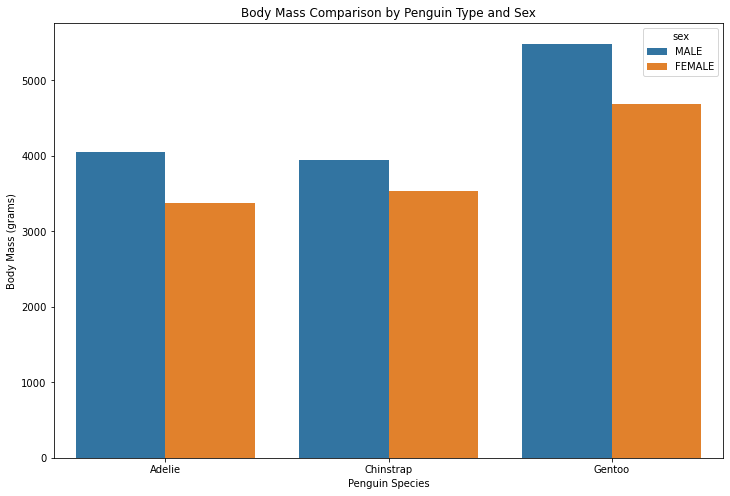

In [46]:
# Plot grouped bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='species', y='body_mass_g', hue='sex', data=penguins, ci=None)
plt.title('Body Mass Comparison by Penguin Type and Sex')
plt.xlabel('Penguin Species')
plt.ylabel('Body Mass (grams)')
plt.show()

In [47]:
# Further Analysis on gentoo penguins

# I adapted from https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm
descriptive_stats_gentoo_male = penguins[(penguins['species'] == 'Gentoo') & (penguins['sex'] == 'MALE')]['body_mass_g'].describe()

print("Descriptive Statistics for Male Gentoo Penguins:")
print(descriptive_stats_gentoo_male)




Descriptive Statistics for Male Gentoo Penguins:
count      61.000000
mean     5484.836066
std       313.158596
min      4750.000000
25%      5300.000000
50%      5500.000000
75%      5700.000000
max      6300.000000
Name: body_mass_g, dtype: float64


In [48]:
descriptive_stats_gentoo_female = penguins[(penguins['species'] == 'Gentoo') & (penguins['sex'] == 'FEMALE')]['body_mass_g'].describe()

print("\nDescriptive Statistics for Female Gentoo Penguins:")
print(descriptive_stats_gentoo_female)


Descriptive Statistics for Female Gentoo Penguins:
count      58.000000
mean     4679.741379
std       281.578294
min      3950.000000
25%      4462.500000
50%      4700.000000
75%      4875.000000
max      5200.000000
Name: body_mass_g, dtype: float64


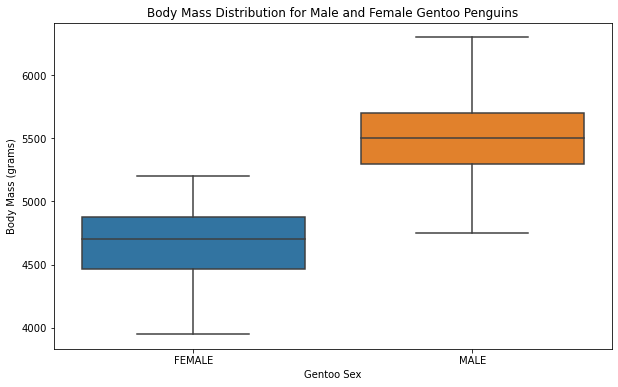

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='body_mass_g', data=penguins[(penguins['species'] == 'Gentoo') & (penguins['sex'].isin(['MALE', 'FEMALE']))])
plt.title('Body Mass Distribution for Male and Female Gentoo Penguins')
plt.xlabel('Gentoo Sex')
plt.ylabel('Body Mass (grams)')
plt.show()


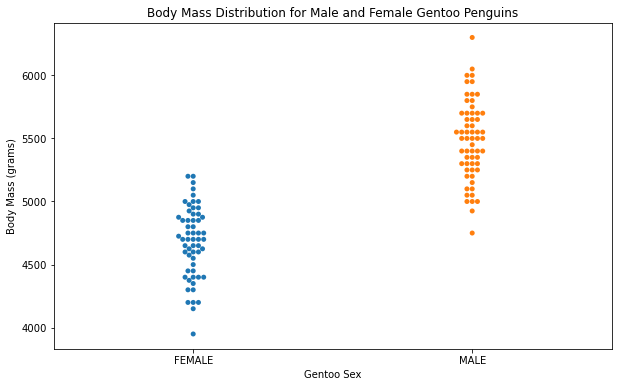

In [50]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='sex', y='body_mass_g', data=penguins[penguins['species'] == 'Gentoo'])
plt.title('Body Mass Distribution for Male and Female Gentoo Penguins')
plt.xlabel('Gentoo Sex')
plt.ylabel('Body Mass (grams)')
plt.show()


In [51]:
# Filter the dataset for male and female Gentoo penguins
male_gentoo = penguins[(penguins['species'] == 'Gentoo') & (penguins['sex'] == 'MALE')]
female_gentoo = penguins[(penguins['species'] == 'Gentoo') & (penguins['sex'] == 'FEMALE')]

# Identify overlapping body mass values
overlapping_values = set(male_gentoo['body_mass_g']).intersection(female_gentoo['body_mass_g'])

# Display penguins with overlapping body mass and count
overlapping_penguins = penguins[(penguins['species'] == 'Gentoo') & (penguins['body_mass_g'].isin(overlapping_values))]
overlapping_count = len(overlapping_penguins)

# Print the overlapping penguins and count
print("Penguins with Overlapping Body Mass:")
print(overlapping_penguins[['species', 'sex', 'body_mass_g']])
print(f"\nCount of Overlapping Penguins: {overlapping_count}")



Penguins with Overlapping Body Mass:
    species     sex  body_mass_g
227  Gentoo    MALE       5200.0
229  Gentoo    MALE       5150.0
241  Gentoo  FEMALE       5000.0
243  Gentoo    MALE       5050.0
244  Gentoo  FEMALE       5000.0
245  Gentoo    MALE       5100.0
252  Gentoo  FEMALE       5050.0
254  Gentoo  FEMALE       5150.0
263  Gentoo    MALE       4750.0
268  Gentoo  FEMALE       5100.0
273  Gentoo    MALE       5000.0
275  Gentoo    MALE       5050.0
277  Gentoo    MALE       5000.0
290  Gentoo  FEMALE       4750.0
291  Gentoo    MALE       5000.0
292  Gentoo    MALE       5100.0
293  Gentoo  FEMALE       5200.0
298  Gentoo  FEMALE       4750.0
304  Gentoo  FEMALE       4750.0
312  Gentoo  FEMALE       4750.0
315  Gentoo    MALE       5200.0
316  Gentoo    MALE       4925.0
330  Gentoo  FEMALE       5000.0
338  Gentoo  FEMALE       4925.0
342  Gentoo  FEMALE       5200.0

Count of Overlapping Penguins: 25


## Notes

- I used this link to get an understanding of t-tests and how I should apply to the dataset: https://blog.minitab.com/en/adventures-in-statistics-2/understanding-t-tests-t-values-and-t-distributions

- I also used this youtube video, which helped more so in how to work with the dataset before doing analysis: https://www.youtube.com/watch?v=KxfC_gzTBVg

- A t-statistic of 8.5545 indicates a substantial difference between the mean body masses of male and female Gentoo penguins. The higher the absolute value of the t-statistic, the more evidence there is against the null hypothesis

- The p-value is the probability of observing a t-statistic as extreme as the one calculated. The p-value is very close to zero (4.79e-16), indicating an extremely low probability of observing such a large t-statistic by random chance.

- I think the graphs are very good are visualising the differences, the box plot shows that female penguins have a body mass approximately between 3400 grams and 4500 grams, whereas male penguins are between 3,900 grams and 5,400 grams. Male penguins for the most part are bigger and have a bigger range of size, than female penguins. We will now look below are more info on just the gentoo penguins.

- I then decided to take specific types and separately review them. To do this I plotted a bar graph with the three penguin types from the dataset, just to see is there any similarities between them. Gentoo are the biggest penguins at approximately an average of 5,600 grams for males, whereas females are an average of 4,700 grams. 

- I like to use descriptive statistics to get more info on a dataset, it shows us very high level data which is useful to show the differences between the gentoo sexes

- 61 male Gentoo penguins, with an average body mass of male Gentoo penguins is approximately 5484.84. In terms of female penguins, there are 58 female Gentoo penguins. The average body mass of female Gentoo penguins is approximately 4679.74 grams. This shows that there are a difference of approximately 805 grams.

- Male Gentoo penguins tend to have a slightly higher body mass compared to females as we can see in the minimum and maximum of both sizes. The smallest observed body mass for male Gentoo penguins is 4750 grams whereas the smallest observed body mass for female Gentoo penguins is 3950 grams.

- Based on the box plot, it seems that there is not a substantial difference in body mass between male and female Gentoo penguins. The similarity in the central tendency and spread of values suggests that, on average, male and female penguins within the Gentoo species have comparable body masses, with some outliers being quite close. 

- I decided to try and locate how many penguins have approximately overlapped, I knew from looking at the graphs that they would be around 5000 grams. This shows that 25 penguins are all around this level, but based on there being 109 gentoo penguins in the dataset it makes sense that there isn't a significant difference, considering the lowest gentoo female is 3950 whereas the max male gentoo is 6,300 grams. If it was a database that was more unevenly distributed I think that opinion but with the data we have, the t-test would fail due to how sparsely different the data is. 

- There is statistical evidence and we can conclude that there is a significant difference in body mass between male and female Gentoo penguins in the dataset.

***

## Task 4

Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.

In [54]:
# Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [56]:
# Load the Iris dataset
iris = load_iris()

In [64]:
# Print dataset information
print("Feature Names:", iris.feature_names)
print("Target Names:", iris.target_names)
print("Number of Instances:", len(iris.data))

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
Number of Instances: 150


In [67]:
# Create a DataFrame with the data and target names
irisdata = pd.DataFrame(data=iris.data, columns=iris.feature_names)
irisdata['species'] = iris.target_names[iris.target]

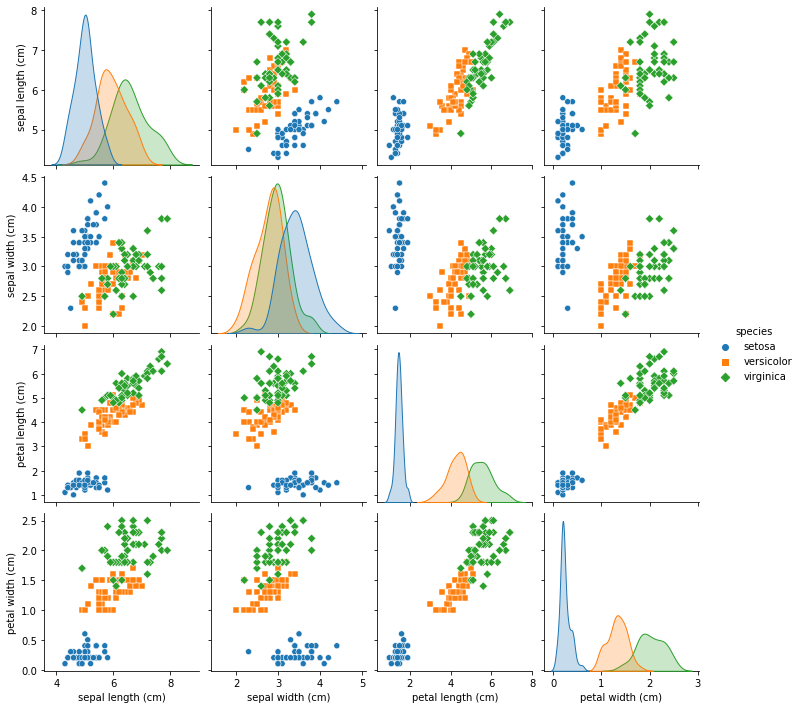

In [72]:
# Pair plot to visualize relationships between features
sns.pairplot(irisdata, hue='species', markers=['o', 's', 'D'])
plt.show()

## Notes on the above

- I think on the above we can immediately see that setosa is far more seperated in terms of petal width, petal length, sepal width and sepal length, whereas versicolor and virginia are much more similar.

- Setosa typically has shorter petal lengths but wider petal widths.

- The data distribution for setosa has less of an overlap with the other species. The less of an overlap makes it far more distinguishable of an Iris from the other species.

- In this next section, we will deep dive in and do further analysis on the data.


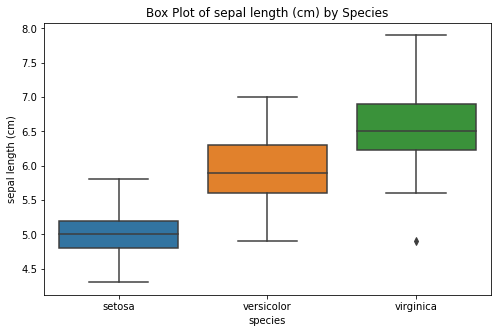

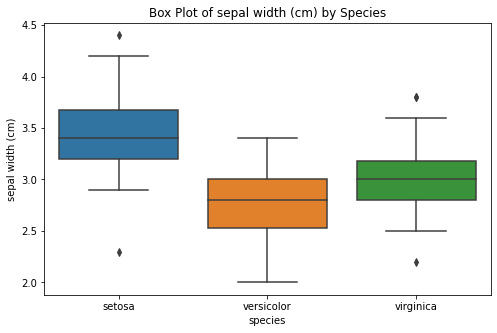

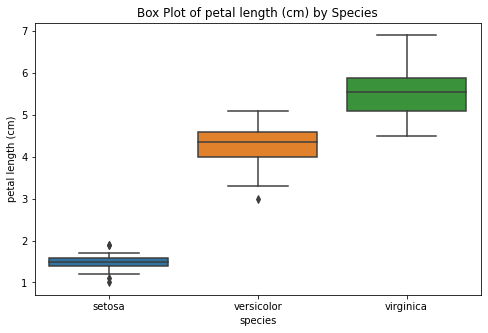

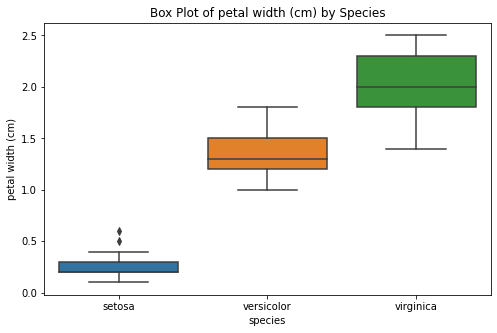

In [76]:
for feature in irisdata.columns[:-1]:  # Exclude the 'species' column
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='species', y=feature, data=irisdata)
    plt.title(f'Box Plot of {feature} by Species')
    plt.show()

In [78]:
## Descripitive Statistics

# Descriptive statistics for Setosa
setosa_data = irisdata[irisdata['species'] == 'setosa']
setosa_stats = setosa_data.describe()
print("\nDescriptive Statistics for Setosa:")
print(setosa_stats)



Descriptive Statistics for Setosa:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count         50.000000  
mean           0.246000  
std            0.105386  
min            0.100000  
25%            0.200000  
50%            0.200000  
75%            0.300000  
max            0.600000  


In [81]:
# Descriptive statistics for Versicolor
versicolor_data = irisdata[irisdata['species'] == 'versicolor']
versicolor_stats = versicolor_data.describe()
print("\nDescriptive Statistics for Versicolor:")
print(versicolor_stats)


Descriptive Statistics for Versicolor:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          50.000000         50.000000          50.000000   
mean            5.936000          2.770000           4.260000   
std             0.516171          0.313798           0.469911   
min             4.900000          2.000000           3.000000   
25%             5.600000          2.525000           4.000000   
50%             5.900000          2.800000           4.350000   
75%             6.300000          3.000000           4.600000   
max             7.000000          3.400000           5.100000   

       petal width (cm)  
count         50.000000  
mean           1.326000  
std            0.197753  
min            1.000000  
25%            1.200000  
50%            1.300000  
75%            1.500000  
max            1.800000  


In [83]:
# Descriptive statistics for Virginica
virginica_data = irisdata[irisdata['species'] == 'virginica']
virginica_stats = virginica_data.describe()
print("\nDescriptive Statistics for Virginica:")
print(virginica_stats)



Descriptive Statistics for Virginica:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             6.58800          2.974000           5.552000   
std              0.63588          0.322497           0.551895   
min              4.90000          2.200000           4.500000   
25%              6.22500          2.800000           5.100000   
50%              6.50000          3.000000           5.550000   
75%              6.90000          3.175000           5.875000   
max              7.90000          3.800000           6.900000   

       petal width (cm)  
count          50.00000  
mean            2.02600  
std             0.27465  
min             1.40000  
25%             1.80000  
50%             2.00000  
75%             2.30000  
max             2.50000  


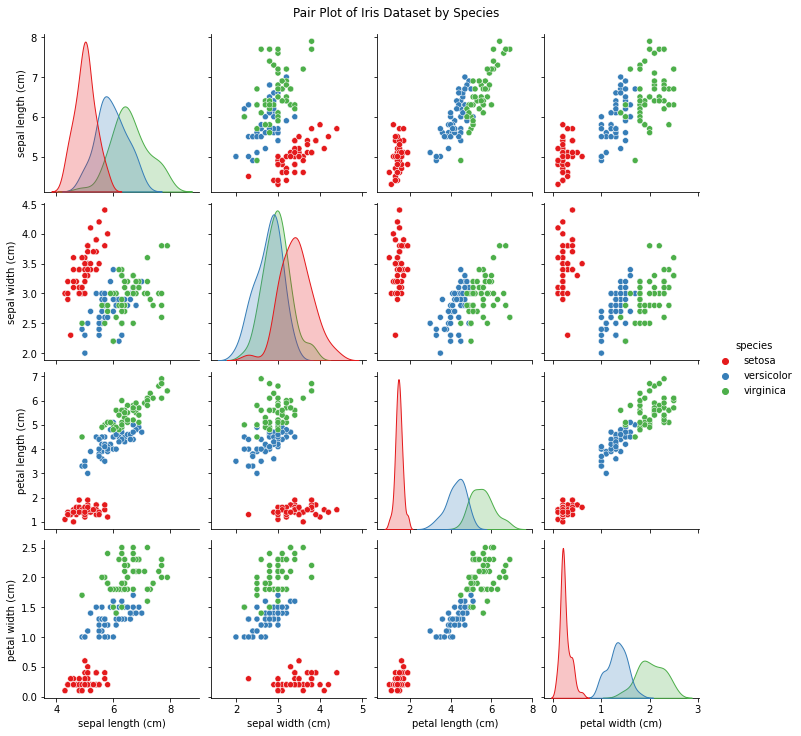

In [96]:
# Create pair plots to visualize relationships between features
sns.pairplot(irisdata, hue='species', palette='Set1')
plt.suptitle('Pair Plot of Iris Dataset by Species', y=1.02)
plt.show()


## Notes

- I think box plots are some of the best for visualising data, as it allows us to see the differences in the medians, interquartile ranges, and the presence of outliers. 

- From the above, we can see that the sepal length of setosa is between 4.8cm and 5.2 cm and are much more smaller in sepal length than the other two flowers. Whereas, versicolor is between approxiamtely 5.6 cm and 6.4 cm and are generally much bigger in terms of size. Virginica is approximately around 6.3 cm to 7.0 cm and is about the same in the deviations of size as versicolor, but setosa is approximately half the sepal length of them both.

- The sepal width of setosa is much more distinctive than the other two flowers which are for the most part are around 3.2cm to 3.6 cm whereas the other two flowers are much more similar, around 2.6 cm to 3 cm for versicolor, whereas virginica are 2.8 to 3.2 cm. The data in general for versicolor and virginica appear to give a broader spread of sepal widths but with setosa being larger.

- I think petal length is where we see the most distinctive differences in the three flowers. Setosa has significantly shorter petal lengths which show a more unique cluster. Setosa is around 1.3 to 1.5 cm, with a number of outliers around 1 and 2. Versicolor is around 4.0 to 4.5 cm. Virginica is around 5 to 5.4 cm. With versicolor and virginica we see a wider range of petal lengths, with some overlap, but are longer than setosa.

- Petal width is also very distinctive for setosa in comparison to the other two flowers. Setosa is approxiately around 0.2 to 0.3 with outliers around 0.5/0.6. Versicolor has a petal width around 1.2 to 1.5 cm and Virginica around 1.8 to 2.4 cm. Versicolor and virginia appear to have wider petal widths, with some overlap, but again generally longer than setosa.

- I think there are a few more observations, that we can see with the box plots. Setosa has distinctive sepal characteristics, especially in terms of sepal width. Versicolor and Virginica are much more variabile in sepal lengths and widths.

- In petal charactertistics, Setosa stands out with significantly shorter petal lengths and widths.
Versicolor and Virginica have a broader range of petal dimensions, with some overlap but generally longer than setosa.

- Setosa vs. Versicolor:

    -Sepal Length:
        Setosa: Mean (5.006) < Versicolor: Mean (5.936)
Setosa generally has smaller sepal length compared to Versicolor.

    -Sepal Width:
        Setosa: Mean (3.428) > Versicolor: Mean (2.77)
Setosa generally has larger sepal width compared to Versicolor.

    -Petal Length:
        Setosa: Mean (1.462) < Versicolor: Mean (4.26)
Setosa generally has smaller petal length compared to Versicolor.

    -Petal Width:
        Setosa: Mean (0.246) < Versicolor: Mean (1.326)
Setosa generally has smaller petal width compared to Versicolor.

- Setosa vs Virginica

    -Sepal Length:
        Setosa: Mean (5.006) < Virginica: Mean (6.588)
Setosa generally has smaller sepal length compared to Virginica.

    -Sepal Width:
        Setosa: Mean (3.428) > Virginica: Mean (2.974)
Setosa generally has larger sepal width compared to Virginica.

    -Petal Length:
        Setosa: Mean (1.462) < Virginica: Mean (5.552)
Setosa generally has smaller petal length compared to Virginica.

    -Petal Width:
        Setosa: Mean (0.246) < Virginica: Mean (2.026)
Setosa generally has smaller petal width compared to Virginica.

- Setosa is generally more compact and smaller in size than the other two species due to its smaller petal length and petal width in most scenarios.

***

## Task 5

Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two. Explain the purpose of the analysis and your results.

In [97]:
# Libraries

#numpys
import numpy as np

#Pandas
import pandas as pd

#Plots
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.datasets import load_iris

import seaborn as sns

## What is Principal Component Analysis?

Principal Component Analysis (PCA) is a method used to convert data from a high-dimensional space to a lower-dimensional space while preserving the maximum amount of information. PCA becomes highly beneficial when dealing with datasets characterized by a multitude of features. In other words, PCA helps reduce the complexity of data, making it easier to analyze while retaining the essential patterns and trends.



https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d#0226(Visited 02/12/2023)

To summarise the above and how it applies to the Iris data set, it allows us to simplify the original four-dimensional measurements into a lower-dimensional representation, which makes it easier to analyse the relationships between the different iris species based on their characteristics.

## Steps on how to apply PCA to the dataset

(Adapted from https://www.simplilearn.com/tutorials/machine-learning-tutorial/principal-component-analysis Visited on 07/01/2023)

1. Load and Explore the Dataset.

2. Standardize the Data: Standardisation is performed to ensure that all variables have the same scale This is necessary as for PCS it relies on the variance of the features.

3. Apply PCA: PCA is applied to transform the standardised data into two principal components.

4. Interpret the Results: Each data point is now characterised by two principal components, which has the most significant sources of variance in the original data.

5. Visualize the Results: The reduced-dimensional data is visualized in a 2D scatter plot. Each point on the plot corresponds to an iris flower, and the colors differentiate between the three species. This visualisation helps identify clusters and patterns among the different iris species.

## Math equations we will use to perform PCA:

I used two resources for this section:
    
(https://builtin.com/data-science/step-step-explanation-principal-component-analysis Accessed on 07/01/2024)

(https://en.wikipedia.org/wiki/Principal_component_analysis Accessed on 07/01/2024)


### Covariance Matrix Computation:

$$ C = \frac{1}{m-1} \cdot (X - \bar{X})^T \cdot (X - \bar{X}) $$

- X is the matrix of data points, where each row represents an observation, and each column represents a variable.

- $\bar{X}$ is the mean vector of the variables.


- m is the number of observations.


### Eigenvectors and Eigenvalues:


The eigenvectors v and corresponding eigenvalues λ of the covariance matrix C satisfy the equation:

$$ C \cdot v = \lambda \cdot v $$

- The principal components are given by the eigenvectors of the covariance matrix. The first principal component is the eigenvector corresponding to the largest eigenvalue, the second principal component corresponds to the second-largest eigenvalue and this will continue until it reaches the endpoint.


### PCA Transformation:

$$ X_{\text{PCA}} = X \cdot V_k $$

- To transform the original data X into the reduced-dimensional space using the first k principal components, you multiply X by the matrix of the first k eigenvectors.

- $\text{PCA}(\mathbf{X})$ is the matrix of data points in the reduced-dimensional space.

- $\mathbf{V}_k$ is the matrix containing the first $k$ eigenvectors as columns.


- These formulas describe the key steps involved in PCA, from computing the covariance matrix to transforming the data into the reduced-dimensional space using eigenvectors and eigenvalues.

In [98]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [99]:
# Create a DataFrame
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y

In [100]:
# Display general information about the dataset
print("General Info on Iris Dataset:")
print(iris_df.info())

General Info on Iris Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [101]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Creating our data to analyse

- PCA(n_components=2) will reduce the dataset to 2 principal components.

- pca.fit_transform(X) analyzes the dataset X to understand its underlying structure and computes the principal components.

- It will then transforms the original dataset X into a new dataset X_pca where each row represents a data point in the reduced-dimensional space defined by the first two principal components.

Visited on 03/12/2023 - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Visited on 03/12/2023 - https://www.datacamp.com/tutorial/principal-component-analysis-in-python

- For the purposes of the question, I will review Petal Length and Petal Width as I think they provide significant infomation on the characterstics of the 3 species.

In [102]:
## Code adapted from https://www.kaggle.com/code/shrutimechlearn/step-by-step-pca-with-iris-dataset
pca = PCA(n_components=2)

In [103]:
pca

PCA(n_components=2)

In [104]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [112]:
# Display the species along with both principal components
for i, (pc1, pc2, species) in enumerate(zip(X_pca[:, 0], X_pca[:, 1], iris.target_names)):
    print(f"Example {i + 1}: PC1 = {pc1:.2f}, PC2 = {pc2:.2f}, Species = {species}")


Example 1: PC1 = -2.68, PC2 = 0.32, Species = setosa
Example 2: PC1 = -2.71, PC2 = -0.18, Species = versicolor
Example 3: PC1 = -2.89, PC2 = -0.14, Species = virginica


In [113]:
setosa = X_pca[y == 0]

# Display the shape and top 5 rows of the setosa array
print(f"Setosa Shape: {setosa.shape}")
print("Top 5 Rows:") 
print(setosa[:5, :])


Setosa Shape: (50, 2)
Top 5 Rows:
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


In [116]:
versicolor = X_pca[y == 1]

# Display the shape and top 5 rows of the setosa array
print(f"Versicolor Shape: {versicolor.shape}")
print("Top 5 Rows:") 
print(versicolor[:5, :])


Versicolor Shape: (50, 2)
Top 5 Rows:
[[ 1.28482569  0.68516047]
 [ 0.93248853  0.31833364]
 [ 1.46430232  0.50426282]
 [ 0.18331772 -0.82795901]
 [ 1.08810326  0.07459068]]


In [119]:
virginica = X_pca[y == 2]

# Display the shape and top 5 rows of the setosa array
print(f"Virginica Shape: {virginica.shape}")
print("Top 5 Rows:") 
print(virginica[:5, :])

Virginica Shape: (50, 2)
Top 5 Rows:
[[ 2.53119273 -0.00984911]
 [ 1.41523588 -0.57491635]
 [ 2.61667602  0.34390315]
 [ 1.97153105 -0.1797279 ]
 [ 2.35000592 -0.04026095]]


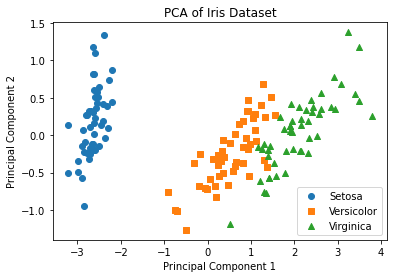

In [122]:
# Plot each species separately
plt.scatter(setosa[:, 0], setosa[:, 1], label='Setosa', marker='o')
plt.scatter(versicolor[:, 0], versicolor[:, 1], label='Versicolor', marker='s')
plt.scatter(virginica[:, 0], virginica[:, 1], label='Virginica', marker='^')

# Add labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()

# Show the plot
plt.show()


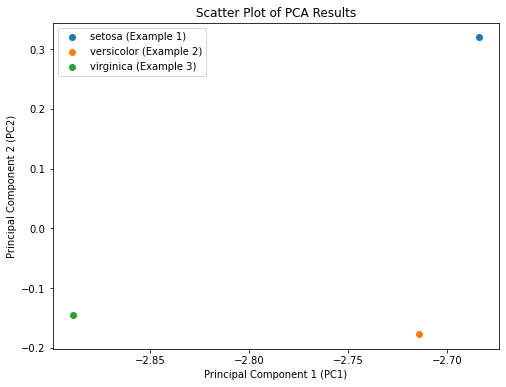

In [124]:
plt.figure(figsize=(8, 6))
for i, (pc1, pc2, species) in enumerate(zip(X_pca[:, 0], X_pca[:, 1], iris.target_names)):
    plt.scatter(pc1, pc2, label=f"{species} (Example {i + 1})", c=f'C{i}')

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Scatter Plot of PCA Results')
plt.legend()
plt.show()


## Notes

- PC1 is the first principal component, which is a linear combination of the original features (sepal length, sepal width, petal length, petal width).

- In our examples:(Setosa): PC1 = -2.68, Versicolor: PC1 = -2.71, Virginica: PC1 = -2.89

- PC2 we achived results of Setosa: PC2 = 0.32, Versicolor: PC2 = -0.18 and Virginica: PC2 = -0.14. These values indicate the position of each example along the PC2 axis.

- The values of PC1 and PC2 represent the coordinates of each example in the reduced-dimensional space after PCA. The negative and the magnitude of the values indicate the direction and magnitude of each example along the respective principal components.

- These results can be used to understand how the examples are positioned in the reduced-dimensional space, providing insights into the separation of the iris species based on the chosen principal components.

- I will also explain what is happening on the section where I displayed the shape and top 5 rows of the setosa array. There are 50 setosa examples, and for each example, there are 2 values representing the coordinates in the reduced-dimensional space (two principal components).

- The printed array shows the coordinates of the first 5 setosa examples in the reduced-dimensional space. Each row corresponds to a setosa example, and the two columns represent the values along the first and second principal components.

End
***